In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

# pyclustering kmeans
from pyclustering.cluster import kmeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.preprocessing import StandardScaler

from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

df = pd.read_csv('Mall_Customers.csv',index_col = False, header=None)
df.head()

,0,1,2,3,4
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       200 non-null    int64 
 1   1       200 non-null    object
 2   2       200 non-null    int64 
 3   3       200 non-null    int64 
 4   4       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
attributes = ["CustomerID", "Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]
df.columns = attributes
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID', axis=1, inplace=True)

In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df.groupby('Gender').value_counts(normalize = True)

Gender  Age  Annual Income (k$)  Spending Score (1-100)
Female  63   65                  43                        0.008929
        57   75                  5                         0.008929
        58   20                  15                        0.008929
        60   50                  49                        0.008929
                                 56                        0.008929
                                                             ...   
Male    48   54                  46                        0.011364
             60                  49                        0.011364
             61                  42                        0.011364
             77                  36                        0.011364
        46   98                  15                        0.011364
Length: 200, dtype: float64

In [7]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [9]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df['Gender'].unique()

array([1, 0])

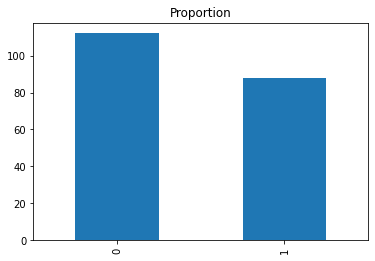

In [11]:
df.describe()
df.Gender.value_counts().plot(kind='bar', title='Proportion');

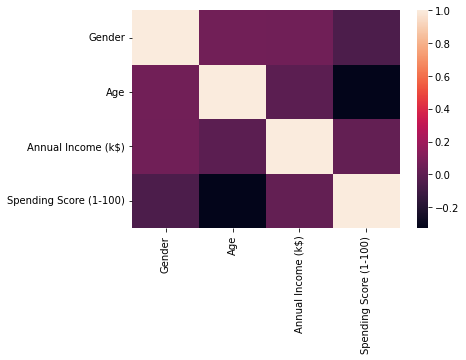

In [12]:
cor = df.corr()
sns.heatmap(cor)
plt.savefig('cor.png')

In [13]:
#Standard Scalar normalizes the data
s = StandardScaler()

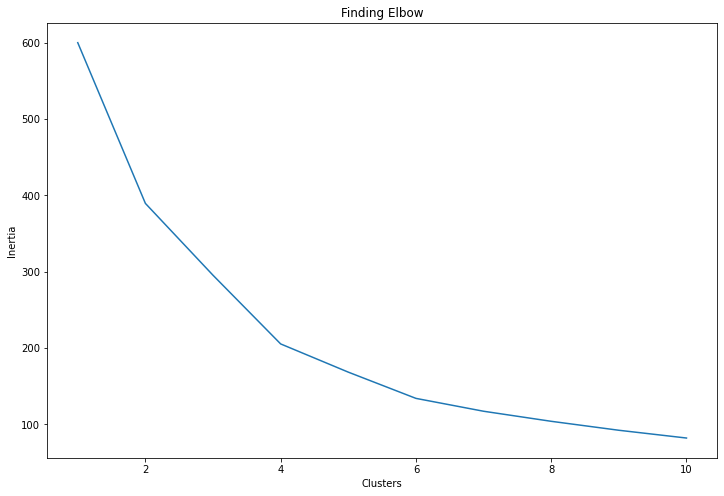

In [14]:
# X = df.drop('Gender', axis=1)
X = s.fit_transform(df.drop('Gender', axis=1))
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters)
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
ax.set_title('Finding Elbow')
plt.savefig('kmeansElbow.png')

In [15]:
#5 or 6 num of clusters looks optimal

/Users/sushantkhanal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


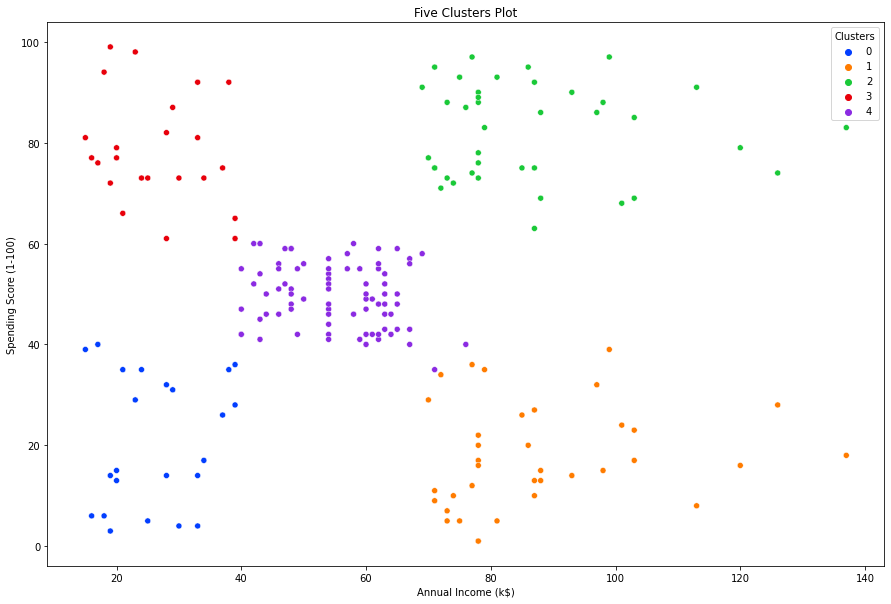

In [16]:
#sklearn KMeans uses Eucledian distance function
X = df.drop('Gender', axis=1)
k = 5
clusters = KMeans(n_clusters = k).fit(X)
X['Clusters'] = clusters.labels_
plt.figure(figsize=(15,10))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Clusters'], 
                palette=sns.color_palette('bright', 5))

plt.title('Five Clusters Plot')
plt.savefig('5ClustersK_Means.png')

/Users/sushantkhanal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


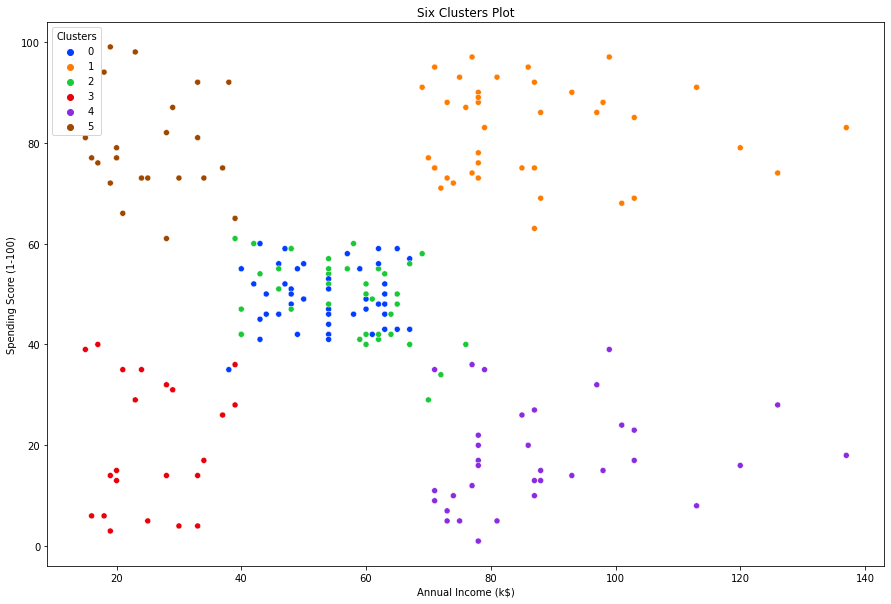

In [17]:
#sklearn KMeans uses Eucledian distance function

k = 6
clusters = KMeans(n_clusters = k).fit(X)
X['Clusters'] = clusters.labels_
plt.figure(figsize=(15, 10))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Clusters'], 
                palette=sns.color_palette('bright', 6))
plt.title('Six Clusters Plot')
plt.savefig('6ClustersK_Means.png')

In [18]:
#sklearn KMeans uses Eucledian distance function


km5 = KMeans(n_clusters = 5)
km_res5 = km5.fit_predict(X)

kmdata = df.copy()
kmdata['group'] = km_res5
kmeansTable = kmdata.groupby('group').mean().sort_values(by = ['Gender', 'Age', 'Annual Income (k$)'])
kmeansTable.to_csv('K_Means5_summary_table.csv')
kmeansTable
# plt.savefig('K_Means6_summary_table.png')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
group,,,,
1,0.391304,25.521739,26.304348,78.565217
4,0.391304,45.217391,26.304348,20.913043
0,0.417722,43.088608,55.291139,49.569620
3,0.461538,32.692308,86.538462,82.128205
2,0.527778,40.666667,87.750000,17.583333


In [19]:
from sklearn.metrics.cluster import contingency_matrix
from pyclustering.cluster.kmeans import kmeans

x = df.iloc[:, 1:5].values 
y = df.iloc[:, -1].values

dist_map = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

def getPurity(label, dist_measure):
    initial_centers = random_center_initializer(x, 3, random_state=5).initialize()
    instanceKm = kmeans(x, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    instanceKm.process()
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, x)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    confusion_matrix = contingency_matrix(y, pyLabels)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

for key, value in dist_map.items():
    print(f"Purity score for {key} distance is {round(getPurity(key, value)*100, 1)}%")

Purity score for euclidean distance is 7.5%
Purity score for squared euclidean distance is 7.5%
Purity score for manhattan distance is 7.5%
Purity score for chebyshev distance is 6.5%
Purity score for canberra distance is 7.0%
Purity score for chi-square distance is 8.0%


In [20]:
#DBSCAN

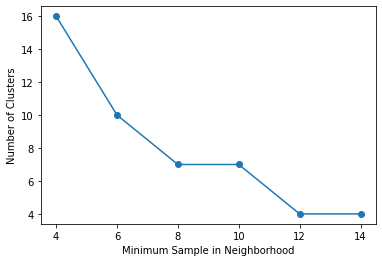

In [21]:
min_sample = [4, 6, 8, 10, 12, 14]
clusters = []

for n in min_sample:
    optics = OPTICS(min_samples = n)
    res = optics.fit_predict(X)
    clusters.append(len(np.unique(res)))
    
plt.plot(min_sample,clusters)
plt.scatter(min_sample,clusters)
plt.xlabel('Minimum Sample in Neighborhood')
plt.ylabel('Number of Clusters');
plt.savefig('dbScanSearchMinSample.png')

/Users/sushantkhanal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


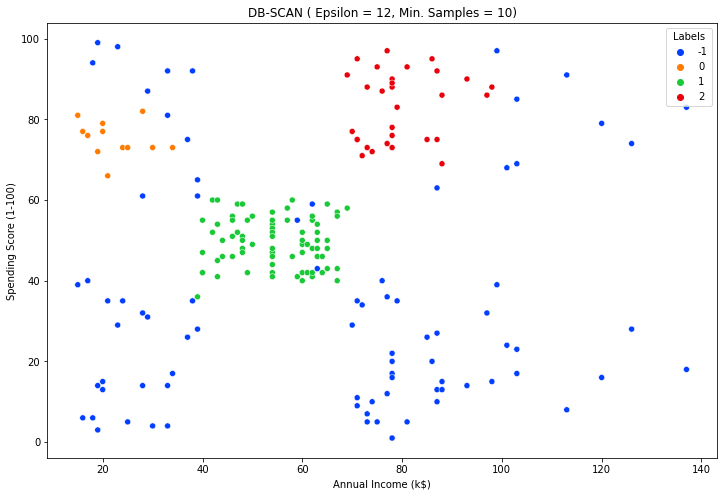

In [22]:
db_clusters = DBSCAN(eps=12, min_samples=10).fit(X)

X['Labels'] = db_clusters.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('bright', np.unique(db_clusters.labels_).shape[0]))
plt.title('DB-SCAN ( Epsilon = 12, Min. Samples = 10)')
plt.savefig('dbscan10min.png')

/Users/sushantkhanal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


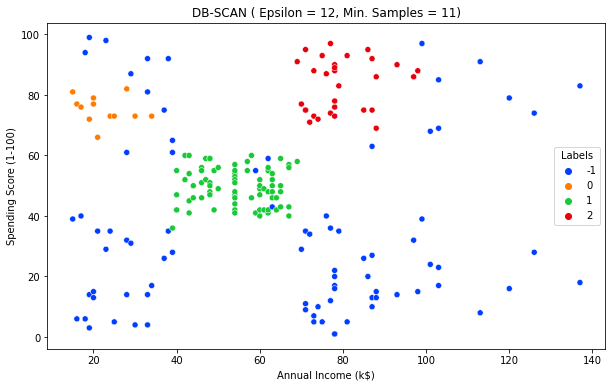

In [23]:
db_clusters = DBSCAN(eps=12, min_samples=11).fit(X)

X['Labels'] = db_clusters.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('bright', np.unique(db_clusters.labels_).shape[0]))
plt.title('DB-SCAN ( Epsilon = 12, Min. Samples = 11)')
plt.savefig('dbscan11min.png')

/Users/sushantkhanal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


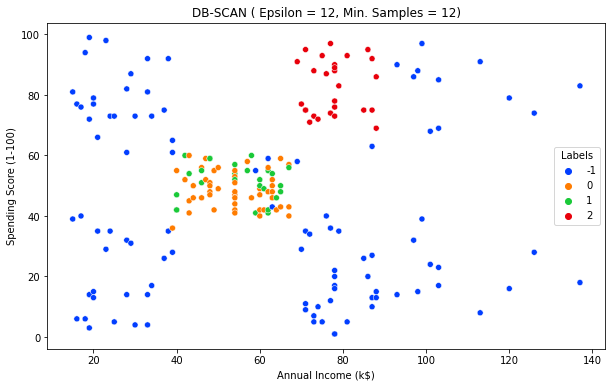

In [24]:
db_clusters = DBSCAN(eps=12, min_samples=12).fit(X)

X['Labels'] = db_clusters.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('bright', np.unique(db_clusters.labels_).shape[0]))
plt.title('DB-SCAN ( Epsilon = 12, Min. Samples = 12)')
plt.savefig('dbscan12min.png')

In [25]:
op10 = OPTICS(min_samples = 10)
res = op10.fit_predict(X)
opdata = df.copy()
opdata['group'] = res
opdata = opdata[opdata.group != -1]
opdata.groupby('group').mean().sort_values(by = ['Gender', 'Age'])


,Gender,Age,Annual Income (k$),Spending Score (1-100)
group,,,,
4,0.285714,32.928571,76.357143,76.000000
2,0.421053,23.000000,59.736842,50.684211
0,0.476190,48.619048,56.095238,47.142857
3,0.500000,24.388889,25.944444,77.222222
1,0.500000,63.500000,47.900000,54.100000
5,0.565217,44.304348,84.391304,14.695652
